# Project 7: Combine Signals for Enhanced Alpha
## Instructions
Each problem consists of a function to implement and instructions on how to implement the function.  The parts of the function that need to be implemented are marked with a `# TODO` comment. After implementing the function, run the cell to test it against the unit tests we've provided. For each problem, we provide one or more unit tests from our `project_tests` package. These unit tests won't tell you if your answer is correct, but will warn you of any major errors. Your code will be checked for the correct solution when you submit it to Udacity.

## Packages
When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages will be imported for you. We recommend you don't add any import statements, otherwise the grader might not be able to run your code.

The other packages that we're importing are `project_helper` and `project_tests`. These are custom packages built to help you solve the problems.  The `project_helper` module contains utility functions and graph functions. The `project_tests` contains the unit tests for all the problems.

### Install Packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 18.9MB 2.0MB/s eta 0:00:01  6% |██                              | 1.2MB 23.4MB/s eta 0:00:01    12% |████                            | 2.4MB 24.2MB/s eta 0:00:01    60% |███████████████████▍            | 11.4MB 21.8MB/s eta 0:00:01
    100% |████████████████████████████████| 17.0MB 2.0MB/s eta 0:00:01   31% |██████████                      | 5.3MB 26.9MB/s eta 0:00:01    54% |█████████████████▋              | 9.3MB 31.7MB/s eta 0:00:01    71% |██████████████████████▉         | 12.1MB 29.0MB/s eta 0:00:01    87% |███████████████████████████▉    | 14.8MB 23.2MB/s eta 0:00:01
    100% |████████████████████████████████| 7.3MB 6.0MB/s eta 0:00:01    10% |███▎                            | 747kB 24.2MB/s eta 0:00:01    27% |█████████                       | 2.0MB 24.8MB/s eta 0:00:01    45% |██████████████▋                 | 3.3MB 27.1MB/s eta 0:00:01
    100% |████████████████████████████████| 50.0MB 732kB/s eta 0:00:01    25% |████████            

  Installing build dependencies ... done
    100% |████████████████████████████████| 624kB 16.8MB/s ta 0:00:01 3% |█                               | 20kB 7.8MB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 14.8MB/s ta 0:00:01    84% |███████████████████████████     | 921kB 22.9MB/s eta 0:00:01
  Installing build dependencies ... done
    100% |████████████████████████████████| 51kB 8.6MB/s eta 0:00:01
  Running setup.py bdist_wheel for alphalens ... done
  Stored in directory: /root/.cache/pip/wheels/77/1e/9a/223b4c94d7f564f25d94b48ca5b9c53e3034016ece3fd8c8c1
  Running setup.py bdist_wheel for pandas ... done
  Stored in directory: /root/.cache/pip/wheels/a3/08/c3/8fdd52954d4b415624cff43c6dd32a22bac90306976a98f4af
  Running setup.py bdist_wheel for zipline ... done
  Stored in directory: /root/.cache/pip/wheels/5d/20/7d/b48368c8634b1cb6cc7232833b2780a265d4217c0ad2e3d24c
  Running setup.py bdist_wheel for Logbook ... done
  Stored in directory: /root/.cache/pip/wheels/

### Load Packages

In [2]:
import project_helper
import project_tests

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Data Pipeline
### Data Bundle
We'll be using Zipline to handle our data. We've created a end of day data bundle for this project. Run the cell below to register this data bundle in zipline.

In [3]:
#ls "../Combine Signals for Enhanced Alpha/data/"

In [4]:
import os
from zipline.data import bundles

# os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), '..', '..', 'data', 'project_7_eod')
os.environ['ZIPLINE_ROOT'] = os.path.join("../Combine Signals for Enhanced Alpha/data/", 'eod_data')

ingest_func = bundles.csvdir.csvdir_equities(['daily'], project_helper.EOD_BUNDLE_NAME)
bundles.register(project_helper.EOD_BUNDLE_NAME, ingest_func)

print('Data Registered')

Data Registered


### Build Pipeline Engine
We'll be using Zipline's pipeline package to access our data for this project. To use it, we must build a pipeline engine. Run the cell below to build the engine.

In [5]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar


universe = AverageDollarVolume(window_length=120).top(500) 
trading_calendar = get_calendar('NYSE') 
bundle_data = bundles.load(project_helper.EOD_BUNDLE_NAME)
engine = project_helper.build_pipeline_engine(bundle_data, trading_calendar)

#### View Data
With the pipeline engine built, let's get the stocks at the end of the period in the universe we're using.

In [6]:
universe_end_date = pd.Timestamp('2016-01-05', tz='UTC')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
universe_tickers

[Equity(0 [A]),
 Equity(1 [AAL]),
 Equity(2 [AAP]),
 Equity(3 [AAPL]),
 Equity(4 [ABBV]),
 Equity(5 [ABC]),
 Equity(6 [ABT]),
 Equity(7 [ACN]),
 Equity(8 [ADBE]),
 Equity(9 [ADI]),
 Equity(10 [ADM]),
 Equity(11 [ADP]),
 Equity(12 [ADS]),
 Equity(13 [ADSK]),
 Equity(14 [AEE]),
 Equity(15 [AEP]),
 Equity(16 [AES]),
 Equity(17 [AET]),
 Equity(18 [AFL]),
 Equity(19 [AGN]),
 Equity(20 [AIG]),
 Equity(21 [AIV]),
 Equity(22 [AIZ]),
 Equity(23 [AJG]),
 Equity(24 [AKAM]),
 Equity(25 [ALB]),
 Equity(26 [ALGN]),
 Equity(27 [ALK]),
 Equity(28 [ALL]),
 Equity(29 [ALLE]),
 Equity(30 [ALXN]),
 Equity(31 [AMAT]),
 Equity(32 [AMD]),
 Equity(33 [AME]),
 Equity(34 [AMG]),
 Equity(35 [AMGN]),
 Equity(36 [AMP]),
 Equity(37 [AMT]),
 Equity(38 [AMZN]),
 Equity(39 [ANDV]),
 Equity(40 [ANSS]),
 Equity(41 [ANTM]),
 Equity(42 [AON]),
 Equity(43 [AOS]),
 Equity(44 [APA]),
 Equity(45 [APC]),
 Equity(46 [APD]),
 Equity(47 [APH]),
 Equity(48 [ARE]),
 Equity(49 [ARNC]),
 Equity(50 [ATVI]),
 Equity(51 [AVB]),
 Equity(

### Get Returns
Not that we have our pipeline built, let's access the returns data. We'll start by building a data portal.

In [7]:
from zipline.data.data_portal import DataPortal


data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

To make the code easier to read, we've built the helper function `get_pricing` to get the pricing from the data portal. 

In [8]:
def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

# Alpha Factors
It's time to start working on the alpha factors. In this project, we'll use the following factors:
- Momentum 1 Year Factor
- Mean Reversion 5 Day Sector Neutral Smoothed Factor
- Overnight Sentiment Smoothed Factor

In [9]:
from zipline.pipeline.factors import CustomFactor, DailyReturns, Returns, SimpleMovingAverage, AnnualizedVolatility
from zipline.pipeline.data import USEquityPricing


factor_start_date = universe_end_date - pd.DateOffset(years=3, days=2)
sector = project_helper.Sector()

def momentum_1yr(window_length, universe, sector):
    return Returns(window_length=window_length, mask=universe) \
        .demean(groupby=sector) \
        .rank() \
        .zscore()

def mean_reversion_5day_sector_neutral_smoothed(window_length, universe, sector):
    unsmoothed_factor = -Returns(window_length=window_length, mask=universe) \
        .demean(groupby=sector) \
        .rank() \
        .zscore()
    return SimpleMovingAverage(inputs=[unsmoothed_factor], window_length=window_length) \
        .rank() \
        .zscore()

class CTO(Returns):
    """
    Computes the overnight return, per hypothesis from
    https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2554010
    """
    inputs = [USEquityPricing.open, USEquityPricing.close]
    
    def compute(self, today, assets, out, opens, closes):
        """
        The opens and closes matrix is 2 rows x N assets, with the most recent at the bottom.
        As such, opens[-1] is the most recent open, and closes[0] is the earlier close
        """
        out[:] = (opens[-1] - closes[0]) / closes[0]
        
class TrailingOvernightReturns(Returns):
    """
    Sum of trailing 1m O/N returns
    """
    window_safe = True
    
    def compute(self, today, asset_ids, out, cto):
        out[:] = np.nansum(cto, axis=0)

def overnight_sentiment_smoothed(cto_window_length, trail_overnight_returns_window_length, universe):
    cto_out = CTO(mask=universe, window_length=cto_window_length)
    unsmoothed_factor = TrailingOvernightReturns(inputs=[cto_out], window_length=trail_overnight_returns_window_length) \
        .rank() \
        .zscore()
    return SimpleMovingAverage(inputs=[unsmoothed_factor], window_length=trail_overnight_returns_window_length) \
        .rank() \
        .zscore()

### Combine the Factors to a single Pipeline
Let's add the factors to a pipeline.

In [10]:
universe = AverageDollarVolume(window_length=120).top(500)
sector = project_helper.Sector()

pipeline = Pipeline(screen=universe)
pipeline.add(
    momentum_1yr(252, universe, sector),
    'Momentum_1YR')
pipeline.add(
    mean_reversion_5day_sector_neutral_smoothed(20, universe, sector),
    'Mean_Reversion_Sector_Neutral_Smoothed')
pipeline.add(
    overnight_sentiment_smoothed(2, 10, universe),
    'Overnight_Sentiment_Smoothed')

## Features and Labels
Let's create some features that we think will help the model make predictions.
### "Universal" Quant Features
To capture the universe, we'll use the following as features:
- Stock Volatility 20d, 120d
- Stock Dollar Volume 20d, 120d
- Sector

In [11]:
pipeline.add(AnnualizedVolatility(window_length=20, mask=universe).rank().zscore(), 'volatility_20d')
pipeline.add(AnnualizedVolatility(window_length=120, mask=universe).rank().zscore(), 'volatility_120d')
pipeline.add(AverageDollarVolume(window_length=20, mask=universe).rank().zscore(), 'adv_20d')
pipeline.add(AverageDollarVolume(window_length=120, mask=universe).rank().zscore(), 'adv_120d')
pipeline.add(sector, 'sector_code')

### Regime Features
We are going to try to capture market-wide regimes. To do that, we'll use the following features:
- High and low volatility 20d, 120d
- High and low dispersion 20d, 120d

In [12]:
class MarketDispersion(CustomFactor):
    inputs = [DailyReturns()]
    window_length = 1
    window_safe = True

    def compute(self, today, assets, out, returns):
        # returns are days in rows, assets across columns
        out[:] = np.sqrt(np.nanmean((returns - np.nanmean(returns))**2))


pipeline.add(SimpleMovingAverage(inputs=[MarketDispersion(mask=universe)], window_length=20), 'dispersion_20d')
pipeline.add(SimpleMovingAverage(inputs=[MarketDispersion(mask=universe)], window_length=120), 'dispersion_120d')

In [13]:
class MarketVolatility(CustomFactor):
    inputs = [DailyReturns()]
    window_length = 1
    window_safe = True
    
    def compute(self, today, assets, out, returns):
        mkt_returns = np.nanmean(returns, axis=1)
        out[:] = np.sqrt(260.* np.nanmean((mkt_returns-np.nanmean(mkt_returns))**2))


pipeline.add(MarketVolatility(window_length=20), 'market_vol_20d')
pipeline.add(MarketVolatility(window_length=120), 'market_vol_120d')

### Target
Let's try to predict the go forward 1-week return. When doing this, it's important to quantize the target. The factor we create is the trailing 5-day return.

In [14]:
pipeline.add(Returns(window_length=5, mask=universe).quantiles(2), 'return_5d')
pipeline.add(Returns(window_length=5, mask=universe).quantiles(25), 'return_5d_p')

### Date Features
Let's make columns for the trees to split on that might capture trader/investor behavior due to calendar anomalies.

In [15]:
all_factors = engine.run_pipeline(pipeline, factor_start_date, universe_end_date)

all_factors['is_Janaury'] = all_factors.index.get_level_values(0).month == 1
all_factors['is_December'] = all_factors.index.get_level_values(0).month == 12
all_factors['weekday'] = all_factors.index.get_level_values(0).weekday
all_factors['quarter'] = all_factors.index.get_level_values(0).quarter
all_factors['qtr_yr'] = all_factors.quarter.astype('str') + '_' + all_factors.index.get_level_values(0).year.astype('str')
all_factors['month_end'] = all_factors.index.get_level_values(0).isin(pd.date_range(start=factor_start_date, end=universe_end_date, freq='BM'))
all_factors['month_start'] = all_factors.index.get_level_values(0).isin(pd.date_range(start=factor_start_date, end=universe_end_date, freq='BMS'))
all_factors['qtr_end'] = all_factors.index.get_level_values(0).isin(pd.date_range(start=factor_start_date, end=universe_end_date, freq='BQ'))
all_factors['qtr_start'] = all_factors.index.get_level_values(0).isin(pd.date_range(start=factor_start_date, end=universe_end_date, freq='BQS'))

all_factors.head()

Mean_Reversion_Sector_Neutral_Smoothed  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                                -0.26276899   
                          Equity(1 [AAL])                               0.09992624   
                          Equity(2 [AAP])                               1.66913824   
                          Equity(3 [AAPL])                              1.69874602   
                          Equity(4 [ABBV])                                     nan   

                                            Momentum_1YR  \
2013-01-03 00:00:00+00:00 Equity(0 [A])      -1.20797813   
                          Equity(1 [AAL])     1.71347052   
                          Equity(2 [AAP])    -1.53506144   
                          Equity(3 [AAPL])    1.19311071   
                          Equity(4 [ABBV])           nan   

                                            Overnight_Sentiment_Smoothed  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                      -1.48566901   
                          Equity(1 [AAL])                     0.91934963   
                          Equity(2 [AAP])                     1.50773340   
                          Equity(3 [AAPL])                   -1.36799226   
                          Equity(4 [ABBV])                   -0.25006310   

                                              adv_120d     adv_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])     1.33857307  1.39741144   
                          Equity(1 [AAL])   1.13999355  1.08115517   
                          Equity(2 [AAP])  -0.30154668 -0.91934963   
                          Equity(3 [AAPL])  1.72837731  1.72837731   
                          Equity(4 [ABBV]) -1.72837731 -1.64747455   

                                            dispersion_120d  dispersion_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.01326964      0.01117804   
                          Equity(1 [AAL])        0.01326964      0.01117804   
                          Equity(2 [AAP])        0.01326964      0.01117804   
                          Equity(3 [AAPL])       0.01326964      0.01117804   
                          Equity(4 [ABBV])       0.01459524      0.01459524   

                                            market_vol_120d  market_vol_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.12966421      0.13758558   
                          Equity(1 [AAL])        0.12966421      0.13758558   
                          Equity(2 [AAP])        0.12966421      0.13758558   
                          Equity(3 [AAPL])       0.12966421      0.13758558   
                          Equity(4 [ABBV])       0.12966421      0.13758558   

                                            return_5d    ...     \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0    ...      
                          Equity(1 [AAL])           1    ...      
                          Equity(2 [AAP])           0    ...      
                          Equity(3 [AAPL])          1    ...      
                          Equity(4 [ABBV])         -1    ...      

                                            volatility_20d  is_Janaury  \
2013-01-03 00:00:00+00:00 Equity(0 [A])        -1.21980876        True   
                          Equity(1 [AAL])       1.56621970        True   
                          Equity(2 [AAP])      -1.47040391        True   
                          Equity(3 [AAPL])      1.61781282        True   
                          Equity(4 [ABBV])             nan        True   

                                            is_December  weekday quarter  \
2013-01-03 00:00:00+00:00 Equity(0 [A])           False        3       1   
                          Equity(1 [AAL])         False        3       1   
                          Equity(2 [AAP])         False        3       1   
                          Equity(3 [AAPL])        False        3       1   
                          Equity(4 [ABBV])        False        3       1   

                                 

### One Hot Encode Sectors
For the model to better understand the sector data, we'll one hot encode this data.

In [16]:
sector_lookup = pd.read_csv(
    os.path.join(os.getcwd(), '..', '..', 'data', 'project_7_sector', 'labels.csv'),
#     os.path.join("../Combine Signals for Enhanced Alpha/data/", 'sector_data', 'labels.csv'),
    index_col='Sector_i')['Sector'].to_dict()
sector_lookup

sector_columns = []
for sector_i, sector_name in sector_lookup.items():
    secotr_column = 'sector_{}'.format(sector_name)
    sector_columns.append(secotr_column)
    all_factors[secotr_column] = (all_factors['sector_code'] == sector_i)

all_factors[sector_columns].head()

sector_Healthcare  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                 True   
                          Equity(1 [AAL])              False   
                          Equity(2 [AAP])              False   
                          Equity(3 [AAPL])             False   
                          Equity(4 [ABBV])              True   

                                           sector_Technology  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                False   
                          Equity(1 [AAL])              False   
                          Equity(2 [AAP])              False   
                          Equity(3 [AAPL])              True   
                          Equity(4 [ABBV])             False   

                                           sector_Consumer Defensive  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                        False   
                          Equity(1 [AAL])                      False   
                          Equity(2 [AAP])                      False   
                          Equity(3 [AAPL])                     False   
                          Equity(4 [ABBV])                     False   

                                           sector_Industrials  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                 False   
                          Equity(1 [AAL])                True   
                          Equity(2 [AAP])               False   
                          Equity(3 [AAPL])              False   
                          Equity(4 [ABBV])              False   

                                           sector_Utilities  \
2013-01-03 00:00:00+00:00 Equity(0 [A])               False   
                          Equity(1 [AAL])             False   
                          Equity(2 [AAP])             False   
                          Equity(3 [AAPL])            False   
                          Equity(4 [ABBV])            False   

                                           sector_Financial Services  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                        False   
                          Equity(1 [AAL])                      False   
                          Equity(2 [AAP])                      False   
                          Equity(3 [AAPL])                     False   
                          Equity(4 [ABBV])                     False   

                                           sector_Real Estate  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                 False   
                          Equity(1 [AAL])               False   
                          Equity(2 [AAP])               False   
                          Equity(3 [AAPL])              False   
                          Equity(4 [ABBV])              False   

                                           sector_Communication Services  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                            False   
                          Equity(1 [AAL])                          False   
                          Equity(2 [AAP])                          False   
                          Equity(3 [AAPL])                         False   
                          Equity(4 [ABBV])                         False   

                                           sector_Consumer Cyclical  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                       False   
                          Equity(1 [AAL])                     False   
                          Equity(2 [AAP])                      True   
                          Equity(3 [AAPL])                    False   
                          Equity(4 [ABBV])                    False   

                                           sector_Energy  \
2013-01-03 00:00:00+00:00 Equity(0 [A])            False   
                          Equity(1 [AAL])          False   
                          Equity(2 [AAP])          False   
                          Equity(3 [AAPL])         False   
                          Equity(4 [ABBV])         False   

 

### Shift Target
We'll use shifted 5 day returns for training the model.

In [17]:
all_factors['target'] = all_factors.groupby(level=1)['return_5d'].shift(-5)

all_factors[['return_5d','target']].reset_index().sort_values(['level_1', 'level_0']).head(10)

,level_0,level_1,return_5d,target
0,2013-01-03 00:00:00+00:00,Equity(0 [A]),0,0.00000000
471,2013-01-04 00:00:00+00:00,Equity(0 [A]),0,0.00000000
942,2013-01-07 00:00:00+00:00,Equity(0 [A]),0,0.00000000
1413,2013-01-08 00:00:00+00:00,Equity(0 [A]),0,1.00000000
1884,2013-01-09 00:00:00+00:00,Equity(0 [A]),0,0.00000000
2355,2013-01-10 00:00:00+00:00,Equity(0 [A]),0,0.00000000
2826,2013-01-11 00:00:00+00:00,Equity(0 [A]),0,0.00000000
3297,2013-01-14 00:00:00+00:00,Equity(0 [A]),0,0.00000000
3768,2013-01-15 00:00:00+00:00,Equity(0 [A]),1,0.00000000
4239,2013-01-16 00:00:00+00:00,Equity(0 [A]),0,0.00000000


### IID Check of Target
Let's see if the returns are independent and identically distributed.

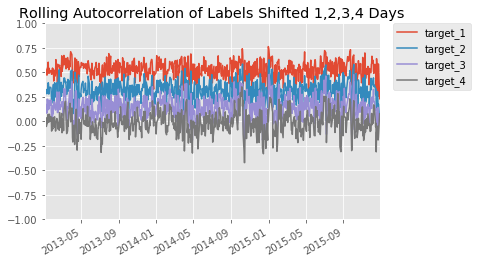

In [18]:
from scipy.stats import spearmanr


def sp(group, col1_name, col2_name):
    x = group[col1_name]
    y = group[col2_name]
    return spearmanr(x, y)[0]


all_factors['target_p'] = all_factors.groupby(level=1)['return_5d_p'].shift(-5)
all_factors['target_1'] = all_factors.groupby(level=1)['return_5d'].shift(-4)
all_factors['target_2'] = all_factors.groupby(level=1)['return_5d'].shift(-3)
all_factors['target_3'] = all_factors.groupby(level=1)['return_5d'].shift(-2)
all_factors['target_4'] = all_factors.groupby(level=1)['return_5d'].shift(-1)

g = all_factors.dropna().groupby(level=0)
for i in range(4):
    label = 'target_'+str(i+1)
    ic = g.apply(sp, 'target', label)
    ic.plot(ylim=(-1, 1), label=label)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title('Rolling Autocorrelation of Labels Shifted 1,2,3,4 Days')
plt.show()

### Question: What do you observe in the rolling autocorrelation of labels shifted?
*#TODO: Put Answer In this Cell*

Looking at the rolling autocorrelation of labels shifted, there is a correlation between the shifted labels.

### Train/Valid/Test Splits
Now let's split the data into a train, validation, and test dataset. Implement the function `train_valid_test_split` to split the input samples, `all_x`, and targets values, `all_y` into a train, validation, and test dataset. The proportion sizes are `train_size`, `valid_size`, `test_size` respectively.

When splitting, make sure the data is in order from train, validation, and test respectivly. Say `train_size` is 0.7, `valid_size` is 0.2, and `test_size` is 0.1. The first 70 percent of `all_x` and `all_y` would be the train set. The next 20 percent of `all_x` and `all_y` would be the validation set. The last 10 percent of `all_x` and `all_y` would be the test set. Make sure not split a day between multiple datasets. It should be contained within a single dataset.

In [19]:
def train_valid_test_split(all_x, all_y, train_size, valid_size, test_size):
    """
    Generate the train, validation, and test dataset.

    Parameters
    ----------
    all_x : DataFrame
        All the input samples
    all_y : Pandas Series
        All the target values
    train_size : float
        The proportion of the data used for the training dataset
    valid_size : float
        The proportion of the data used for the validation dataset
    test_size : float
        The proportion of the data used for the test dataset

    Returns
    -------
    x_train : DataFrame
        The train input samples
    x_valid : DataFrame
        The validation input samples
    x_test : DataFrame
        The test input samples
    y_train : Pandas Series
        The train target values
    y_valid : Pandas Series
        The validation target values
    y_test : Pandas Series
        The test target values
    """
    assert train_size >= 0 and train_size <= 1.0
    assert valid_size >= 0 and valid_size <= 1.0
    assert test_size >= 0 and test_size <= 1.0
    assert train_size + valid_size + test_size == 1.0
    
    # TODO: Implement
    
    df_length = len(all_x)
    train_length = round(df_length * train_size)
    valid_length = round(df_length * valid_size)

    X_train = all_x[: train_length]
    X_valid = all_x[train_length : train_length + valid_length]
    X_test = all_x[train_length + valid_length:]
    
    y_train = all_y[: train_length]
    y_valid = all_y[train_length : train_length + valid_length]
    y_test = all_y[train_length + valid_length :]

    return X_train, X_valid, X_test, y_train, y_valid, y_test

project_tests.test_train_valid_test_split(train_valid_test_split)

Tests Passed


With `train_valid_test_split` implemented, let's split the data into a train, validation, and test set. For this, we'll use some of the features and the 5 day returns for our target.

In [20]:
features = [
    'Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR',
    'Overnight_Sentiment_Smoothed', 'adv_120d', 'adv_20d',
    'dispersion_120d', 'dispersion_20d', 'market_vol_120d',
    'market_vol_20d', 'volatility_20d',
    'is_Janaury', 'is_December', 'weekday',
    'month_end', 'month_start', 'qtr_end', 'qtr_start'] + sector_columns
target_label = 'target'

temp = all_factors.dropna().copy()
X = temp[features]
y = temp[target_label]

X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X, y, 0.6, 0.2, 0.2)

X_train.head()

Mean_Reversion_Sector_Neutral_Smoothed  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                                -0.26276899   
                          Equity(1 [AAL])                               0.09992624   
                          Equity(2 [AAP])                               1.66913824   
                          Equity(3 [AAPL])                              1.69874602   
                          Equity(5 [ABC])                              -1.11399249   

                                            Momentum_1YR  \
2013-01-03 00:00:00+00:00 Equity(0 [A])      -1.20797813   
                          Equity(1 [AAL])     1.71347052   
                          Equity(2 [AAP])    -1.53506144   
                          Equity(3 [AAPL])    1.19311071   
                          Equity(5 [ABC])    -0.50920924   

                                            Overnight_Sentiment_Smoothed  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                      -1.48566901   
                          Equity(1 [AAL])                     0.91934963   
                          Equity(2 [AAP])                     1.50773340   
                          Equity(3 [AAPL])                   -1.36799226   
                          Equity(5 [ABC])                    -0.02941919   

                                              adv_120d     adv_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])     1.33857307  1.39741144   
                          Equity(1 [AAL])   1.13999355  1.08115517   
                          Equity(2 [AAP])  -0.30154668 -0.91934963   
                          Equity(3 [AAPL])  1.72837731  1.72837731   
                          Equity(5 [ABC])   0.17651513  0.22799871   

                                            dispersion_120d  dispersion_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.01326964      0.01117804   
                          Equity(1 [AAL])        0.01326964      0.01117804   
                          Equity(2 [AAP])        0.01326964      0.01117804   
                          Equity(3 [AAPL])       0.01326964      0.01117804   
                          Equity(5 [ABC])        0.01326964      0.01117804   

                                            market_vol_120d  market_vol_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.12966421      0.13758558   
                          Equity(1 [AAL])        0.12966421      0.13758558   
                          Equity(2 [AAP])        0.12966421      0.13758558   
                          Equity(3 [AAPL])       0.12966421      0.13758558   
                          Equity(5 [ABC])        0.12966421      0.13758558   

                                            volatility_20d  \
2013-01-03 00:00:00+00:00 Equity(0 [A])        -1.21980876   
                          Equity(1 [AAL])       1.56621970   
                          Equity(2 [AAP])      -1.47040391   
                          Equity(3 [AAPL])      1.61781282   
                          Equity(5 [ABC])      -1.36721767   

                                                    ...            \
2013-01-03 00:00:00+00:00 Equity(0 [A])             ...             
                          Equity(1 [AAL])           ...             
                          Equity(2 [AAP])           ...             
                          Equity(3 [AAPL])          ...             
                          Equity(5 [ABC])           ...             

                                           sector_Technology  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                False   
                          Equity(1 [AAL])              False   
                          Equity(2 [AAP])              False   
                          Equity(3 [AAPL])              True   
                          Equity(5 [ABC])              False   

                                           sector_Consumer Defensive  \
2013-01-03 00:00:00+00:00 Equity(0 [A])                        False   
                     

## Random Forests
### Visualize a Simple Tree
Let's see how a single tree would look using our data.

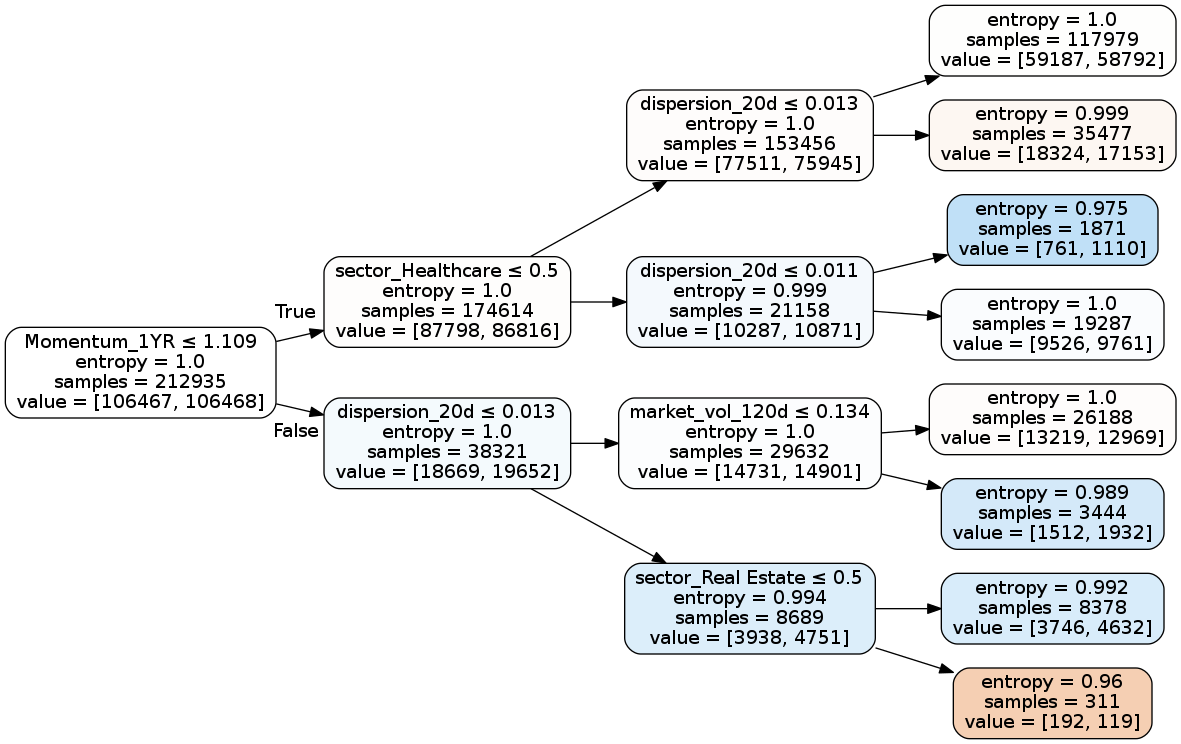

      Feature                                    Importance
 1. dispersion_20d                         (0.46906384204681034)
 2. market_vol_120d                        (0.19309260186206437)
 3. sector_Real Estate                     (0.12805249553637688)
 4. Momentum_1YR                           (0.11251007216356754)
 5. sector_Healthcare                      (0.09728098839118092)
 6. sector_Basic Materials                 (0.0)
 7. weekday                                (0.0)
 8. Overnight_Sentiment_Smoothed           (0.0)
 9. adv_120d                               (0.0)
10. adv_20d                                (0.0)
11. dispersion_120d                        (0.0)
12. market_vol_20d                         (0.0)
13. volatility_20d                         (0.0)
14. is_Janaury                             (0.0)
15. is_December                            (0.0)
16. month_end                              (0.0)
17. sector_Energy                          (0.0)
18. month_start            

In [21]:
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier


# This is to get consistent results between each run.
clf_random_state = 0

simple_clf = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    random_state=clf_random_state)
simple_clf.fit(X_train, y_train)

display(project_helper.plot_tree_classifier(simple_clf, feature_names=features))
project_helper.rank_features_by_importance(simple_clf.feature_importances_, features)

### Question: Why does dispersion_20d have the highest feature importance, when the first split is on the Momentum_1YR feature?
*#TODO: Put Answer In this Cell*

The feature 'dispersion_20d' has been used more frequently as decision criteria to split nodes as a result of higher Information Gain(IG)

### Train Random Forests with Different Tree Sizes
Let's build models using different tree sizes to find the model that best generalizes.
#### Parameters
When building the models, we'll use the following parameters.

In [22]:
n_days = 10
n_stocks = 500

clf_parameters = {
    'criterion': 'entropy',
    'min_samples_leaf': n_stocks * n_days,
    'oob_score': True,
    'n_jobs': -1,
    'random_state': clf_random_state}
n_trees_l = [50, 100, 250, 500, 1000]

Recall from the lesson, that we’ll choose a min_samples_leaf parameter to be small enough to allow the tree to fit the data with as much detail as possible, but not so much that it overfits.  We can first propose 500, which is the number of assets in the estimation universe. Since we have about 500 stocks in the stock universe, we’ll want at least 500 stocks in a leaf for the leaf to make a prediction that is representative.  It’s common to multiply this by 2,3,5 or 10, so we’d have min samples leaf of 500, 1000, 1500, 2500, and 5000. If we were to try these values, we’d notice that the model is “too good to be true” on the training data.  A good rule of thumb for what is considered “too good to be true”, and therefore a sign of overfitting, is if the sharpe ratio is greater than 4.  Based on this, we recommend using min_sampes_leaf of 10 * 500, or 5,000.

Feel free to try other values for these parameters, but also keep in mind that making too many small adjustments to hyper-parameters can lead to overfitting even the validation data, and therefore lead to less generalizable performance on the out-of-sample test set.  So when trying different parameter values, choose values that are different enough in scale (i.e. 10, 20, 100 instead of 10,11,12).

In [23]:
from sklearn.ensemble import RandomForestClassifier


train_score = []
valid_score = []
oob_score = []
feature_importances = []

for n_trees in tqdm(n_trees_l, desc='Training Models', unit='Model'):
    clf = RandomForestClassifier(n_trees, **clf_parameters)
    clf.fit(X_train, y_train)
    
    train_score.append(clf.score(X_train, y_train.values))
    valid_score.append(clf.score(X_valid, y_valid.values))
    oob_score.append(clf.oob_score_)
    feature_importances.append(clf.feature_importances_)

Training Models: 100%|██████████| 5/5 [08:58<00:00, 107.63s/Model]


Let's look at the accuracy of the classifiers over the number of trees.

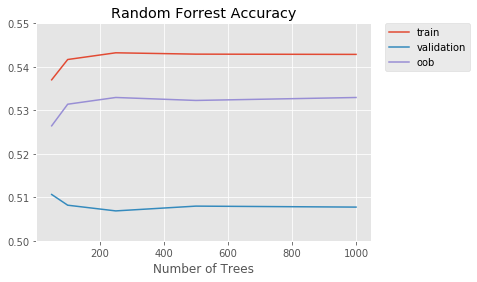

In [24]:
project_helper.plot(
    [n_trees_l]*3,
    [train_score, valid_score, oob_score],
    ['train', 'validation', 'oob'],
    'Random Forrest Accuracy',
    'Number of Trees')

#### Question: 1) What do you observe with the accuracy vs tree size graph? 2) Does the graph indicate the model is overfitting or underfitting? Describe how it indicates this.
*#TODO: Put Answer In this Cell*

The training accuracy and oob score seem to increase as the number of trees increase. This suggests that there might be overfitting in the model.

On considering the validation accuracy, it decreases as the number of trees increase, which clearly suggests the model is overfitting with the increase in number of trees.

Now let's looks at the average feature importance of the classifiers.

In [25]:
print('Features Ranked by Average Importance:\n')
project_helper.rank_features_by_importance(np.average(feature_importances, axis=0), features)

Features Ranked by Average Importance:

      Feature                                    Importance
 1. dispersion_20d                         (0.12742279770366496)
 2. volatility_20d                         (0.12211762811258346)
 3. market_vol_120d                        (0.10505343646707362)
 4. market_vol_20d                         (0.10399885723099297)
 5. Momentum_1YR                           (0.09459227131175249)
 6. dispersion_120d                        (0.08000578877089091)
 7. Overnight_Sentiment_Smoothed           (0.0774541666929297)
 8. Mean_Reversion_Sector_Neutral_Smoothed (0.06908070334789244)
 9. adv_120d                               (0.06000321008458087)
10. adv_20d                                (0.05462989929952139)
11. sector_Healthcare                      (0.03166388283649806)
12. sector_Basic Materials                 (0.012390384493708117)
13. sector_Consumer Defensive              (0.011210583999157997)
14. sector_Industrials                     (0.01067301

You might notice that some of the features of low to no importance. We will be removing them when training the final model.
### Model Results
Let's look at some additional metrics to see how well a model performs. We've created the function `show_sample_results` to show the following results of a model:
- Sharpe Ratios
- Factor Returns
- Factor Rank Autocorrelation

In [26]:
import alphalens as al


all_assets = all_factors.index.levels[1].values.tolist()
all_pricing = get_pricing(
    data_portal,
    trading_calendar,
    all_assets,
    factor_start_date,
    universe_end_date)

def show_sample_results(data, samples, classifier, factors, pricing=all_pricing):
    # Calculate the Alpha Score
    prob_array=[-1,1]
    alpha_score = classifier.predict_proba(samples).dot(np.array(prob_array))
    
    # Add Alpha Score to rest of the factors
    alpha_score_label = 'AI_ALPHA'
    factors_with_alpha = data.loc[samples.index].copy()
    factors_with_alpha[alpha_score_label] = alpha_score
    
    # Setup data for AlphaLens
    print('Cleaning Data...\n')
    factor_data = project_helper.build_factor_data(factors_with_alpha[factors + [alpha_score_label]], pricing)
    print('\n-----------------------\n')
    
    # Calculate Factor Returns and Sharpe Ratio
    factor_returns = project_helper.get_factor_returns(factor_data)
    sharpe_ratio = project_helper.sharpe_ratio(factor_returns)
    
    # Show Results
    print('             Sharpe Ratios')
    print(sharpe_ratio.round(2))
    project_helper.plot_factor_returns(factor_returns)
    project_helper.plot_factor_rank_autocorrelation(factor_data)

#### Results
Let's compare our AI Alpha factor to a few other factors. We'll use the following:

In [27]:
factor_names = [
    'Mean_Reversion_Sector_Neutral_Smoothed',
    'Momentum_1YR',
    'Overnight_Sentiment_Smoothed',
    'adv_120d',
    'volatility_20d']

##### Training Prediction
Let's see how well the model runs on training data.

Cleaning Data...

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

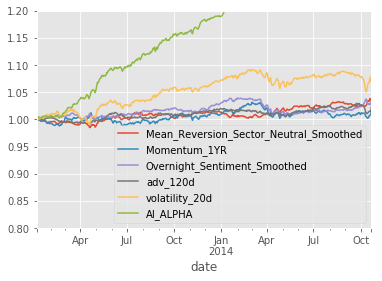

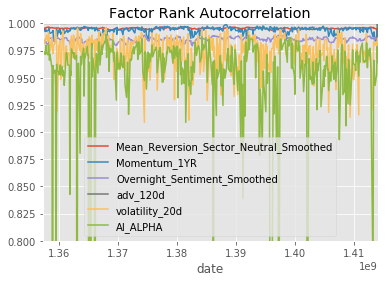

In [28]:
show_sample_results(all_factors, X_train, clf, factor_names)

##### Validation Prediction
Let's see how well the model runs on validation data.

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

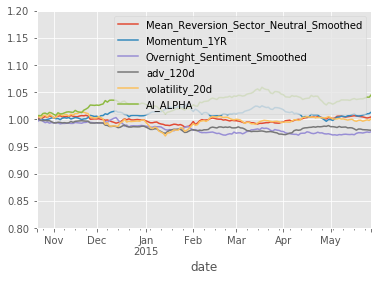

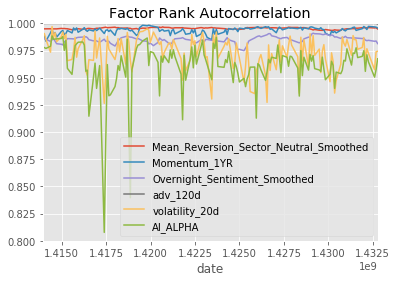

In [29]:
show_sample_results(all_factors, X_valid, clf, factor_names)

So that's pretty extraordinary. Even when the input factor returns are sideways to down, the AI Alpha is positive with Sharpe Ratio > 2. If we hope that this model will perform well in production we need to correct though for the non-IID labels and mitigate likely overfitting.

## Overlapping Samples
Let's fix this by removing overlapping samples. We can do a number of things:

- Don't use overlapping samples
- Use BaggingClassifier's `max_samples`
- Build an ensemble of non-overlapping trees

In this project, we'll do all three methods and compare.
### Drop Overlapping Samples
This is the simplest of the three methods. We'll just drop any overlapping samples from the dataset. Implement the `non_overlapping_samples` function to return a new dataset overlapping samples. 

In [30]:
def non_overlapping_samples(x, y, n_skip_samples, start_i=0):
    """
    Get the non overlapping samples.

    Parameters
    ----------
    x : DataFrame
        The input samples
    y : Pandas Series
        The target values
    n_skip_samples : int
        The number of samples to skip
    start_i : int
        The starting index to use for the data
    
    Returns
    -------
    non_overlapping_x : 2 dimensional Ndarray
        The non overlapping input samples
    non_overlapping_y : 1 dimensional Ndarray
        The non overlapping target values
    """
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    
    # TODO: Implement
    
    x_idx = x.index.levels[0][start_i::n_skip_samples+1].tolist()
    y_idx = y.index.levels[0][start_i::n_skip_samples+1].tolist()
    
    return x.loc[x_idx], y.loc[y_idx]

project_tests.test_non_overlapping_samples(non_overlapping_samples)

Tests Passed


With the dataset created without overlapping samples, lets train a new model and look at the results.

#### Train Model

In [31]:
train_score = []
valid_score = []
oob_score = []

for n_trees in tqdm(n_trees_l, desc='Training Models', unit='Model'):
    clf = RandomForestClassifier(n_trees, **clf_parameters)
    clf.fit(*non_overlapping_samples(X_train, y_train, 4))
    
    train_score.append(clf.score(X_train, y_train.values))
    valid_score.append(clf.score(X_valid, y_valid.values))
    oob_score.append(clf.oob_score_)

Training Models: 100%|██████████| 5/5 [01:09<00:00, 13.80s/Model]


#### Results

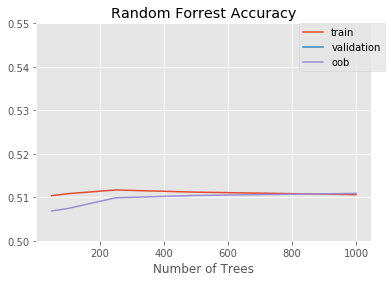

In [32]:
project_helper.plot(
    [n_trees_l]*3,
    [train_score, valid_score, oob_score],
    ['train', 'validation', 'oob'],
    'Random Forrest Accuracy',
    'Number of Trees')

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

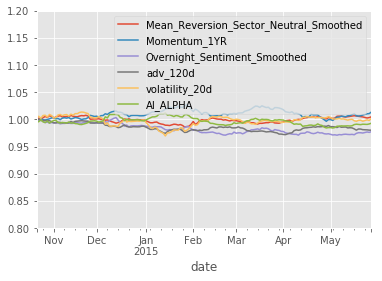

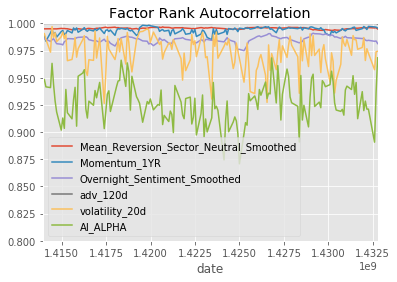

In [33]:
show_sample_results(all_factors, X_valid, clf, factor_names)

This looks better, but we are throwing away a lot of information by taking every 5th row.

### Use BaggingClassifier's `max_samples`
In this method, we'll set `max_samples` to be on the order of the average uniqueness of the labels. Since  `RandomForrestClassifier` does not take this param, we're using `BaggingClassifier`. Implement `bagging_classifier` to build the bagging classifier.

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


def bagging_classifier(n_estimators, max_samples, max_features, parameters):
    """
    Build the bagging classifier.

    Parameters
    ----------
    n_estimators : int 
        The number of base estimators in the ensemble
    max_samples : float 
        The proportion of input samples drawn from when training each base estimator
    max_features : float 
        The proportion of input sample features drawn from when training each base estimator
    parameters : dict
        Parameters to use in building the bagging classifier
        It should contain the following parameters:
            criterion
            min_samples_leaf
            oob_score
            n_jobs
            random_state
    
    Returns
    -------
    bagging_clf : Scikit-Learn BaggingClassifier
        The bagging classifier
    """
    
    required_parameters = {'criterion', 'min_samples_leaf', 'oob_score', 'n_jobs', 'random_state'}
    assert not required_parameters - set(parameters.keys())
    
    # TODO: Implement
    
    tree_clf = DecisionTreeClassifier(criterion = parameters['criterion'], 
                                      min_samples_leaf = parameters['min_samples_leaf'], 
                                      random_state = clf_random_state)
    
    bagging_clf = BaggingClassifier(base_estimator = tree_clf, 
                                    n_estimators = n_estimators, 
                                    max_samples = max_samples,
                                    max_features = max_features,
                                    oob_score = parameters['oob_score'],
                                    n_jobs = parameters['n_jobs'],
                                    random_state = parameters['random_state'])
    
    return bagging_clf

project_tests.test_bagging_classifier(bagging_classifier)

Tests Passed


With the bagging classifier built, lets train a new model and look at the results.
#### Train Model

In [35]:
train_score = []
valid_score = []
oob_score = []

for n_trees in tqdm(n_trees_l, desc='Training Models', unit='Model'):
    clf = bagging_classifier(n_trees, 0.2, 1.0, clf_parameters)
    clf.fit(X_train, y_train)
    
    train_score.append(clf.score(X_train, y_train.values))
    valid_score.append(clf.score(X_valid, y_valid.values))
    oob_score.append(clf.oob_score_)

Training Models: 100%|██████████| 5/5 [12:52<00:00, 154.48s/Model]


#### Results

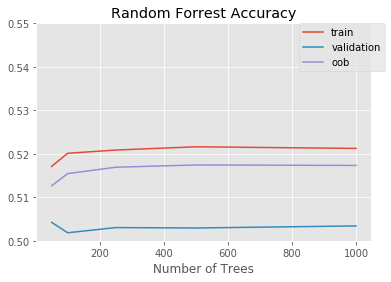

In [36]:
project_helper.plot(
    [n_trees_l]*3,
    [train_score, valid_score, oob_score],
    ['train', 'validation', 'oob'],
    'Random Forrest Accuracy',
    'Number of Trees')

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

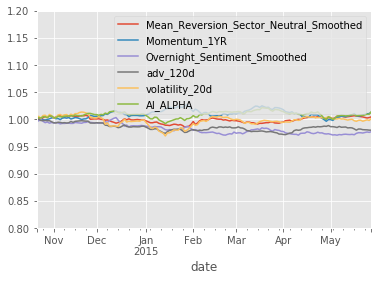

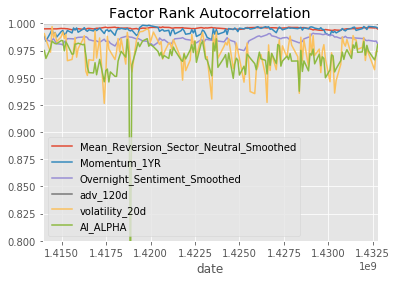

In [37]:
show_sample_results(all_factors, X_valid, clf, factor_names)

This seems much "better" in the sense that we have much better fidelity between the three.


### Build an ensemble of non-overlapping trees
The last method is to create ensemble of non-overlapping trees. Here we are going to write a custom `scikit-learn` estimator. We inherit from `VotingClassifier` and we override the `fit` method so we fit on non-overlapping periods.

In [38]:
import abc

from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import Bunch


class NoOverlapVoterAbstract(VotingClassifier):
    @abc.abstractmethod
    def _calculate_oob_score(self, classifiers):
        raise NotImplementedError
        
    @abc.abstractmethod
    def _non_overlapping_estimators(self, x, y, classifiers, n_skip_samples):
        raise NotImplementedError
    
    def __init__(self, estimator, voting='soft', n_skip_samples=4):
        # List of estimators for all the subsets of data
        estimators = [('clf'+str(i), estimator) for i in range(n_skip_samples + 1)]
        
        self.n_skip_samples = n_skip_samples
        super().__init__(estimators, voting)
    
    def fit(self, X, y, sample_weight=None):
        estimator_names, clfs = zip(*self.estimators)
        self.le_ = LabelEncoder().fit(y)
        self.classes_ = self.le_.classes_
        
        clone_clfs = [clone(clf) for clf in clfs]
        self.estimators_ = self._non_overlapping_estimators(X, y, clone_clfs, self.n_skip_samples)
        self.named_estimators_ = Bunch(**dict(zip(estimator_names, self.estimators_)))
        self.oob_score_ = self._calculate_oob_score(self.estimators_)
        
        return self

You might notice that two of the functions are abstracted. These will be the functions that you need to implement.
#### OOB Score
In order to get the correct OOB score, we need to take the average of all the estimator's OOB scores. Implement `calculate_oob_score` to calculate this score.

In [39]:
def calculate_oob_score(classifiers):
    """
    Calculate the mean out-of-bag score from the classifiers.

    Parameters
    ----------
    classifiers : list of Scikit-Learn Classifiers
        The classifiers used to calculate the mean out-of-bag score
    
    Returns
    -------
    oob_score : float
        The mean out-of-bag score
    """
    
    # TODO: Implement
    
    return np.mean([clf.oob_score_ for clf in classifiers])


project_tests.test_calculate_oob_score(calculate_oob_score)

Tests Passed


#### Non Overlapping Estimators
With `calculate_oob_score` implemented, let's create non overlapping estimators. Implement `non_overlapping_estimators` to build non overlapping subsets of the data, then run a estimator on each subset of data.

In [40]:
def non_overlapping_estimators(x, y, classifiers, n_skip_samples):
    """
    Fit the classifiers to non overlapping data.

    Parameters
    ----------
    x : DataFrame
        The input samples
    y : Pandas Series
        The target values
    classifiers : list of Scikit-Learn Classifiers
        The classifiers used to fit on the non overlapping data
    n_skip_samples : int
        The number of samples to skip
    
    Returns
    -------
    fit_classifiers : list of Scikit-Learn Classifiers
        The classifiers fit to the the non overlapping data
    """
    
    # TODO: Implement

    fit_classifiers = []
    
    for i, clf in enumerate(classifiers):
        x, y = non_overlapping_samples(x, y, n_skip_samples=n_skip_samples)
        fit_classifiers.append(clf.fit(x, y))

    return fit_classifiers 


project_tests.test_non_overlapping_estimators(non_overlapping_estimators)

Tests Passed


In [41]:
class NoOverlapVoter(NoOverlapVoterAbstract):
    def _calculate_oob_score(self, classifiers):
        return calculate_oob_score(classifiers)
        
    def _non_overlapping_estimators(self, x, y, classifiers, n_skip_samples):
        return non_overlapping_estimators(x, y, classifiers, n_skip_samples)

Now that we have our `NoOverlapVoter` class, let's train it.

#### Train Model

In [42]:
train_score = []
valid_score = []
oob_score = []

for n_trees in tqdm(n_trees_l, desc='Training Models', unit='Model'):
    clf = RandomForestClassifier(n_trees, **clf_parameters)
    
    clf_nov = NoOverlapVoter(clf)
    clf_nov.fit(X_train, y_train)
    
    train_score.append(clf_nov.score(X_train, y_train.values))
    valid_score.append(clf_nov.score(X_valid, y_valid.values))
    oob_score.append(clf_nov.oob_score_)

Training Models: 100%|██████████| 5/5 [05:45<00:00, 69.09s/Model]


#### Results

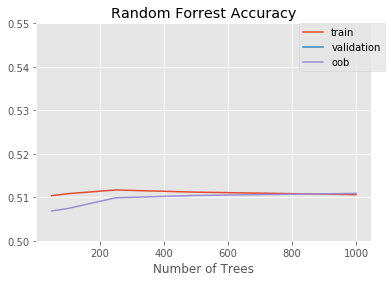

In [43]:
project_helper.plot(
    [n_trees_l]*3,
    [train_score, valid_score, oob_score],
    ['train', 'validation', 'oob'],
    'Random Forrest Accuracy',
    'Number of Trees')

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

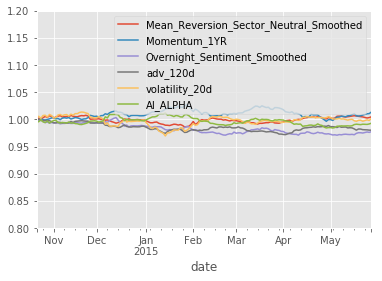

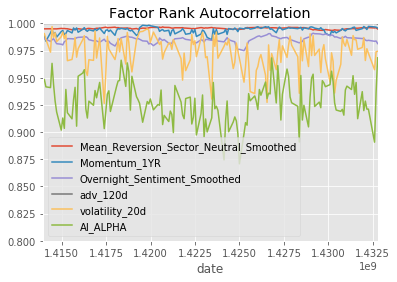

In [44]:
show_sample_results(all_factors, X_valid, clf_nov, factor_names)

## Final Model
### Re-Training Model
In production, we would roll forward the training. Typically you would re-train up to the "current day" and then test. Here, we will train on the train & validation dataset.

In [45]:
n_trees = 500

clf = RandomForestClassifier(n_trees, **clf_parameters)
clf_nov = NoOverlapVoter(clf)
clf_nov.fit(
    pd.concat([X_train, X_valid]),
    pd.concat([y_train, y_valid]))

NoOverlapVoter(estimator=None, n_skip_samples=4, voting='soft')

### Results
#### Accuracy

In [46]:
print('train: {}, oob: {}, valid: {}'.format(
    clf_nov.score(X_train, y_train.values),
    clf_nov.score(X_valid, y_valid.values),
    clf_nov.oob_score_))

train: 0.5098457275694461, oob: 0.5133844289779932, valid: 0.5071330686250395


#### Train

Cleaning Data...

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

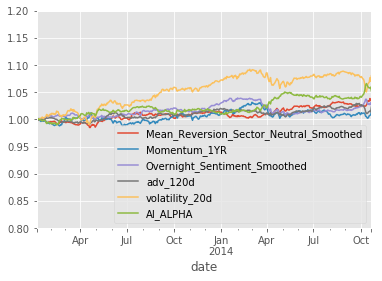

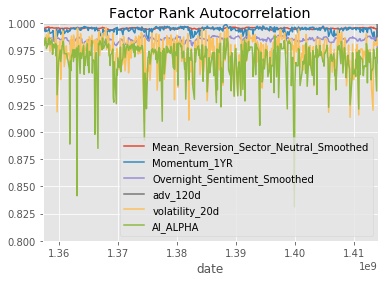

In [47]:
show_sample_results(all_factors, X_train, clf_nov, factor_names)

#### Validation

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

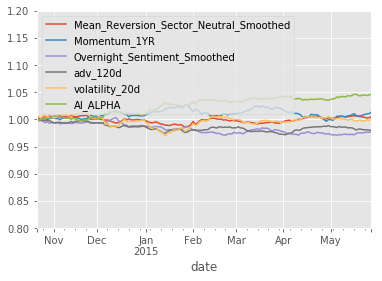

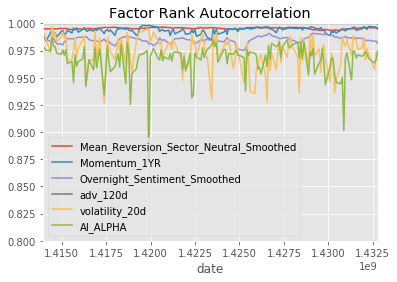

In [48]:
show_sample_results(all_factors, X_valid, clf_nov, factor_names)

#### Test

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: O

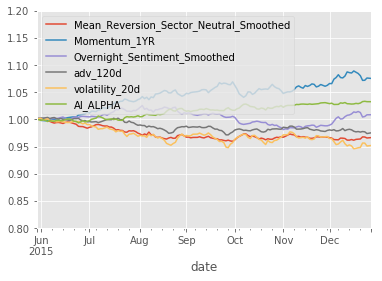

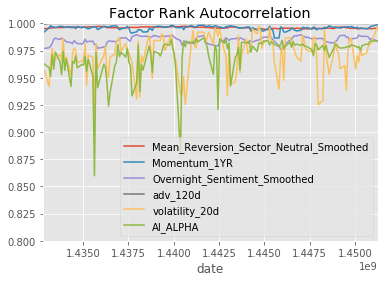

In [49]:
show_sample_results(all_factors, X_test, clf_nov, factor_names)

So, hopefully you are appropriately amazed by this. Despite the significant differences between the factor performances in the three sets, the AI APLHA is able to deliver positive performance.

## Submission
Now that you're done with the project, it's time to submit it. Click the submit button in the bottom right. One of our reviewers will give you feedback on your project with a pass or not passed grade. You can continue to the next section while you wait for feedback.